# Part I - Exploration of the Ford GoBike System Data
## Cyril Selase Kwaku Akafia

## Introduction

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The data is available for public use under the following license: https://www.lyft.com/bikes/bay-wheels/system-data. 

## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


Accessing the Data

In [3]:
# load in the dataset into a pandas dataframe

df = pd.read_csv("201902-fordgobike-tripdata.csv")
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


In [4]:
# high-level overview of data shape and composition

df.shape

(183412, 16)

In [5]:
# check general info about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
# summary of statistics for numeric variables

df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
# check value counts for all columns

df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [8]:
# check value counts for user_type

df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [9]:
# check value counts for member_gender

df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [10]:
# check value counts for bike_share_for_all_trip

df.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [11]:
# check for duplicates in the dataset

df.duplicated().sum()

0

In [12]:
# check for null values in the dataset

df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

**Issues with the Data**

1. There are null values in the dataset
2. User type column is a string, it should be a categorical variable
3. Member gender column is a string, it should be a categorical variable
4. Bike share for all trip column is a string, it should be a categorical variable
5. Start station id and end station id column is a float, it should be an integer
6. The bike id column is a float, it should be a string
7. Member birth year column is a float, it should be an integer
8. The start and end time columns are in string format

**Wrangling/Clean the Data**

In [13]:
# make a copy of the data

df_clean = df.copy()

In [14]:
# drop null values

df_clean.dropna(inplace=True)

In [15]:
# convert user_type, member gender and bike share for all trip columns to category

df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

In [16]:
# convert the start_station_id column and the end_station_id column to string

df_clean.start_station_id = df_clean.start_station_id.astype(int).astype(str)
df_clean.end_station_id = df_clean.end_station_id.astype(int).astype(str)

In [17]:
# convert bike_id column to string

df_clean.bike_id = df_clean.bike_id.astype(str)

In [18]:
# convert member_birth_year column to int64

df_clean.member_birth_year = df_clean.member_birth_year.astype(int)

In [19]:
# convert the start_time column and the end_time column to datetime

df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

**Check to see if changes were made**

In [20]:
# check to see if the changes were made

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [21]:
# check for summary of statistics for numeric variables

df_clean.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,37.771220,-122.351760,37.771414,-122.351335,1984.803135
std,1642.204905,0.100391,0.117732,0.100295,0.117294,10.118731
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,1987.000000
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,1992.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000


### What is the structure of your dataset?

There are 183412 samples and 16 features in the dataset. The features are as follows: duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year. There are a few numerical variables with most variables being categorical or strings.

### What is/are the main feature(s) of interest in your dataset?

I am most interested in figuring out the following:
1. What is the average trip duration?
2. What is the average trip distance?
3. What is the average trip duration for each user type?
4. What is the average trip distance for each user type?
4. The relationship between gender and other variables
4. The relationship between age and other variables
5. The relationship between date/period and other features.

Generally, I am interested in investigating trends in the dataset

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect the following features to help support my investigation into my feature(s) of interest:
1. duration_sec
2. user_type
3. end_time
4. start_time
5. start_station_name
6. end_station_name
7. user_type
8. member_birth_year
9. member_gender
10. bike_share_for_all_trip
11. trip_duration

## Univariate Exploration

In [22]:
# Make a copy of the dataset for analysis
df_plot = df_clean.copy()

**Question: What is the distrubution of trip duration in seconds**


**Visualize**

In [23]:
# write a function to plot histograms with doctring

def plot_hist(dataframe, feature, no_bins, lim, xlabel):
    """
    This function plots a histogram for a given feature.
    """
    plt.figure(figsize=(8, 5))
    plt.hist(data=dataframe, x = feature, bins = no_bins)
    plt.xlim(0, lim)
    plt.xlabel(xlabel)

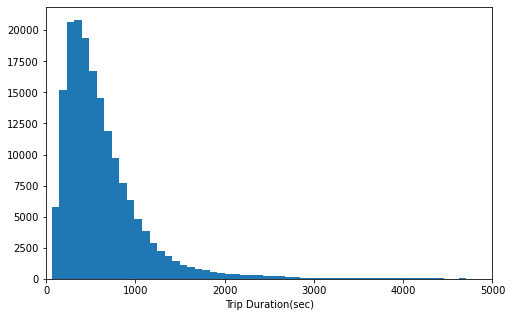

In [24]:
# visualize trip duration distribution

plot_hist(df_plot, 'duration_sec', 1000, 5000, 'Trip Duration(sec)')

**Observation**

The distribution is unimodal and skewed to the right

**Question: What is the distrubution of trip distance**

**Visualize**

In [25]:
# define a function to calculate the distance between two points on a map

# import the necessary libraries

from math import sin, cos, sqrt, atan2, radians

def distance(lat1, lon1, lat2, lon2):
    """
    This function calculates the distance between two points on a map.
    """
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

# calculate the distance between start and end stations

df_plot['distance'] = df_plot.apply(lambda x: distance(x['start_station_latitude'], x['start_station_longitude'], x['end_station_latitude'], x['end_station_longitude']), axis=1)

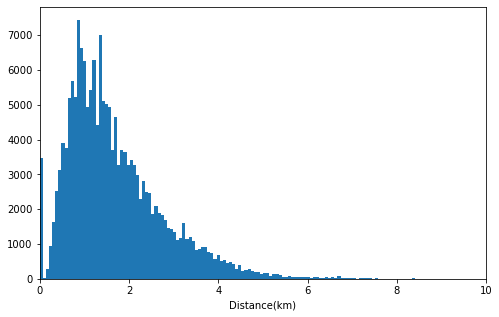

In [26]:
# visualize distance distribution

plot_hist(df_plot, 'distance', 1000, 10, 'Distance(km)')

**Observation**

The distribution of the distance is similar to the distribution of the trip duration. It is unimodal and skewed to the right. The relationship between the drip duration and distance will be discussed in the bivariate exploration section.

Also from the plot, there are about 3500 people who have travelled a distance of 0 km. This is probably because the start and end station are the same. This will be investigated in the bivariate exploration section. 

**Question: What is the distribution of categorical variables?**

I will look at the distribution of the categorical datatypes `user_type`, `member_gender` and `bike_share_for_all_trip`.

**Visualize**

In [27]:
# make a function to plot pie charts

def plot_pie(column):
    """
    This function plots a pie chart for a given column.
    """
    plt.pie(column.value_counts(), labels = column.value_counts().index, autopct='%1.1f%%', startangle=90, counterclock=False);

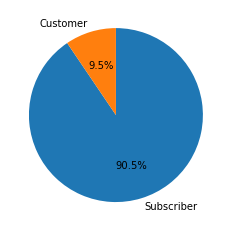

In [28]:
# plot distribution of user_type feature on pie chartt
plot_pie(df_plot.user_type)

**Observation**

The majority of the users are Subscribers. 

In [29]:
# write a function to plot bar chars

def plot_bar(dataframe, feature, color, xlabel):
    """
    This function plots a bar chart for a given feature.
    """
    sb.countplot(data=dataframe, x = feature, color=sb.color_palette()[color]);
    plt.xlabel(xlabel)

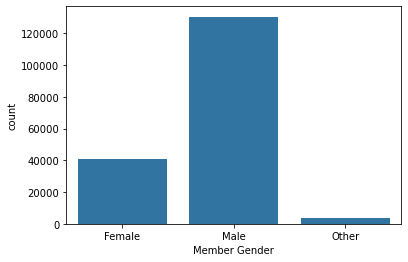

In [30]:
# plot the distribution of member_gender feature
plot_bar(df_plot, 'member_gender', 0, 'Member Gender')

**Observation**

Most of the users of the bikes were males. With others being the least. The number of male and female for each user type will be looked at in the bivariate exploration.

**Visualize**

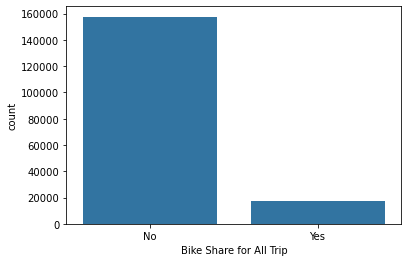

In [31]:
# plot the distribution of bike_share_for_all_trip feature

plot_bar(df_plot, 'bike_share_for_all_trip', 0, 'Bike Share for All Trip')

**Observation**

Most of the users did not share bikes for all trips.

**Question: What is the distribution of the age of the users?**

**Visualize**

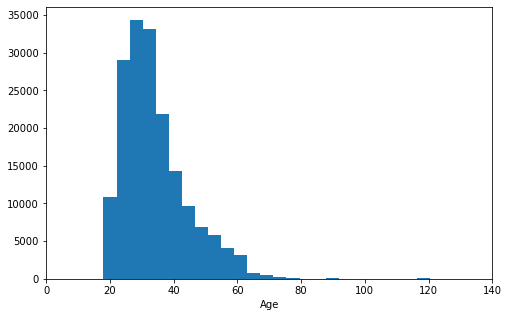

In [32]:
# visualize the distibution of age of users

# calculate the age of users
df_plot['member_age'] = 2019 - df_plot['member_birth_year']

# plot the distibution of age of users
plot_hist(df_plot, 'member_age', 30, 140, 'Age')

**Observation**

From this plot, it can be seen that majority of the users had ages between 25 and 40. The distribution of the age is also unimodal and skewed to the right.

**Question: What is the distribution of the start time hour and end time hour**

Extracting features from datetime column and plotting the distribution of the features

In [33]:
# extract variables from datetime column

# extract hour and day of week from start_time

df_plot['start_time_hour'] = df_plot['start_time'].dt.hour
df_plot['start_time_day'] = df_plot['start_time'].dt.day_name()

# extract hour and day of week from end_time

df_plot['end_time_hour'] = df_plot['end_time'].dt.hour
df_plot['end_time_day'] = df_plot['end_time'].dt.day_name()

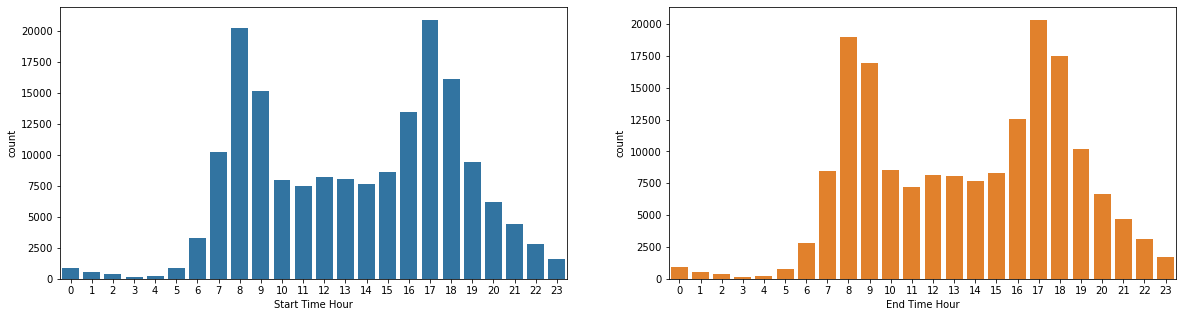

In [34]:
# plot as subplots the distribution of start_time_hour and end_time_hour

plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 1)
plot_bar(df_plot, 'start_time_hour', 0, 'Start Time Hour')

plt.subplot(1, 2, 2)
plot_bar(df_plot, 'end_time_hour', 1, 'End Time Hour')

**Observation**

The distribution of the start time and end time of the trips are very similar. They are both bimodal. This is because the trips are usually short. This prompts a question, what is the average trip duration?

Question: What is the average trip duration?

In [35]:
# what is the average trip duration?

df_plot['duration_min'] = df_plot['duration_sec']/60
df_plot['duration_min'].mean()

11.733379060161425

I will investigate the average trip duration for each user type and gender under bivariate

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

There was no need to perform transformations. My variables of interest had distributions that were expected. The only unusual point was the distribution of the trip duration. It was skewed to the right. This means that the majority of the trips were short. This was expected because the majority of the users were subscribers. Subscribers usually use the bikes for short trips.
I plotted the distribution of the following variables:
* Duration
* Distance
* Age
* Start time
* End time
* Bike share for all trip
* Member gender and user type


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There were no unusual distributions. I performed operations on the data to tidy, adjust or change the form of the data. I changed the data type of the `start_time` and `end_time` columns to datetime. I also extracted features from the datetime column. I also changed the data type of the `user` to categorical. I extracted `duration_min` from the `duration_sec` column. I also changed the data type of the `member_birth_year` column to integer. I calculated the `distance` in km column from the latitudes and longitudes columns

## Bivariate Exploration

**Question: What is the relationship between the trip duration and the trip distance?**

**Visualization**

In [40]:
# what is the range of trip distance

df_plot['distance'].min(), df_plot['distance'].max()

(0.0, 69.49104863702263)

(0.0, 500.0)

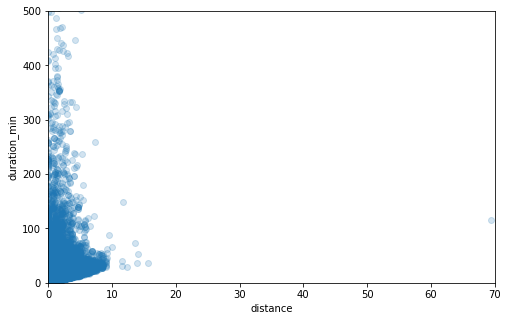

In [41]:
# plot the relationship between trip duration and distance on a scatter plot

plt.figure(figsize = [8, 5])
sb.regplot(data = df_plot, x = 'distance', y = 'duration_min', fit_reg = False, scatter_kws = {'alpha' : 1/5});
plt.xlim(0, 70)
plt.ylim(0, 500)

**Observation**

Very few bike rides were above 10 km whilst the majority of the rides were below 100 minutes. 

**Question: What is the average trip duration for each user type and gender** 

**Visualize**

In [42]:
# what is the average trip duration for each user type?

df_plot.groupby('user_type')['duration_min'].mean()

user_type
Customer      21.844268
Subscriber    10.675855
Name: duration_min, dtype: float64

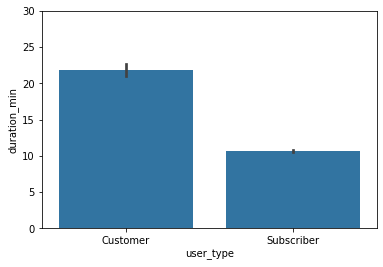

In [43]:
# plot the average trip duration for each user type
sb.barplot(data=df_plot, x='user_type', y='duration_min', color=sb.color_palette()[0]);
plt.ylim(0, 30);

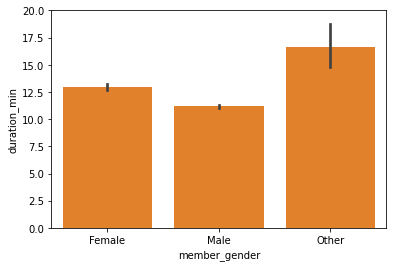

In [44]:
# plot the average trip duration for member_gender
sb.barplot(data=df_plot, x='member_gender', y='duration_min', color=sb.color_palette()[1]);
plt.ylim(0, 20);

**Observation**

The average trip duration is 12 minutes. This is not surprising because the distribution of the trip duration is skewed to the right. This means that the majority of the trips are short. Customers took longer trips that subcribers. Also, the average trip by a woman was longer than the average trip by a man. This may require further investigation.

**Question: What is the relationship between age and the trip duration**

**Visualize**

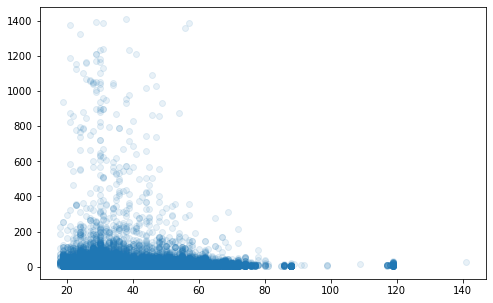

In [45]:
# plot the relationship between trip duration and age on a scatter plot

plt.figure(figsize=(8, 5))
plt.scatter(data=df_plot, x='member_age', y='duration_min', alpha=0.1);

**Observation**

From the plot it can be seen that users between ages 20 and 60 usually ride the bicycles for longer distances as compared to users above these ages. However as expected most rides were below 100 minutes.

**Question: What is the average trip distance**

**Visualization**

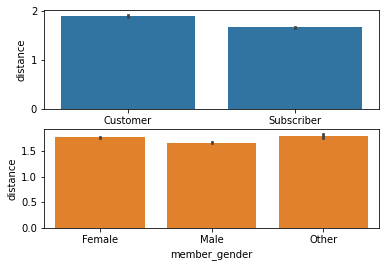

In [46]:
# plot the average trip distance for each user type and member gender as subplots

plt.subplot(2, 1, 1)
sb.barplot(data=df_plot, x='user_type', y='distance', color=sb.color_palette()[0]);

plt.subplot(2, 1, 2)
sb.barplot(data=df_plot, x='member_gender', y='distance', color=sb.color_palette()[1]);

**Observation**

Customers and females travelled longer distances.

**Question: What is the distribution of people with a trip distance of 0 km. Does this mean that the start and end station are the same or they did not travel at all? **

**Visualization**

**Question: What is the gender distribution of the users for each user type?**

**Visualize**

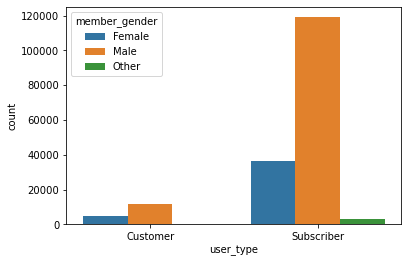

In [47]:
# plot the distribution of gender of users on a pie chart

sb.countplot(data=df_plot, x='user_type', hue='member_gender');

**Observation**

For both user types, i.e., Customer and Subscriber, Males are the majority of the users. This is not surprising because the majority gender is male. This will be further investigated in the multivariate exploration.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* Very few bike rides were above 10 km whilst the majority of the rides were below 200 minutes. 
* The average trip duration is 12 minutes. This is not surprising because the distribution of the trip duration is skewed to the right. This means that the majority of the trips are short. Customers took longer trips that subcribers. Also, the average trip by a woman was longer than the average trip by a man. This may require further investigation.
* From the plot it can be seen that users between ages 20 and 60 usually ride the bicycles for longer distances as compared to users above these ages. However as expected most rides were below 100 minutes.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* For both user types, i.e., Customer and Subscriber, Males are the majority of the users. This is not surprising because the majority gender is male. This will be further investigated in the multivariate exploration.
* Customers and females travelled longer distances

## Multivariate Exploration

**Question: What is the average trip duration for each user type and gender**

**Visualize**

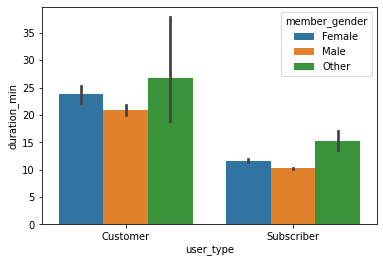

In [48]:
# plot the average trip duration for each user type and gender

sb.barplot(data=df_plot, x='user_type', y='duration_min', hue='member_gender');

**Observation**

For both user types, customers and subscribers, the 'other' gender took the longest trips. Considering the two majority genders, females took longer rides

**Question: What is the average trip distance for each user type and gender**

**Visualize**

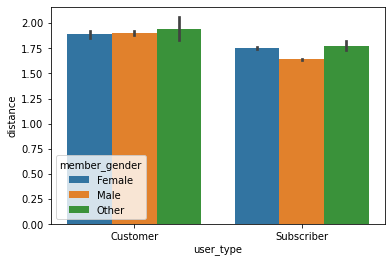

In [49]:
# plot the average trip distance for each user type and gender

sb.barplot(data=df_plot, x='user_type', y='distance', hue = 'member_gender');

Considering the two main (majority) genders, Male Customers to longer distance rides on average than Female Customers whilst, the opposite is true for Subscribers. Female Subscribers took longer distance rides than male subscribers. However the difference is not significant. The 'other' gender took longer distance rides for both user types.

**Question: What is the relationship between age, trip duration and trip distance for each user type?**

**Visualization**

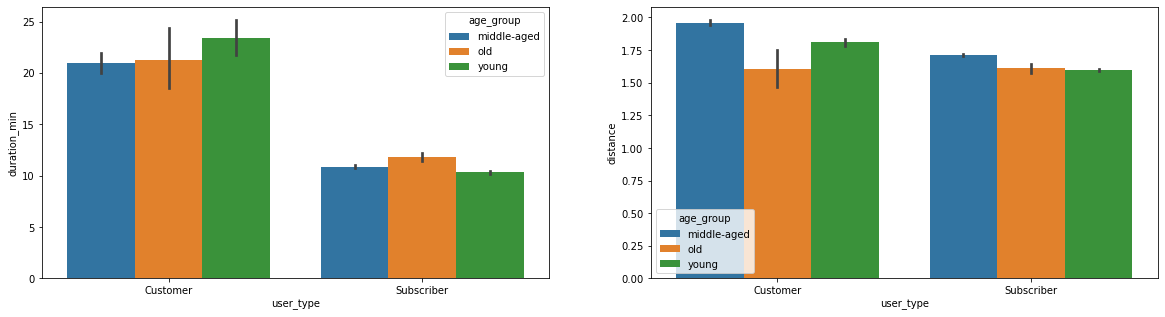

In [54]:
# create categories for age young, middle-aged, old

df_plot['age_group'] = df_plot['member_age'].apply(lambda x: 'young' if x < 30 else ('middle-aged' if x < 60 else 'old'))

# plot the relationship between age and trip duration and distance for each user type with bar charts

plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 1)
sb.barplot(data=df_plot, x='user_type', y='duration_min', hue='age_group');

plt.subplot(1, 2, 2)
sb.barplot
sb.barplot(data=df_plot, x='user_type', y='distance', hue='age_group');


**Observation**

Young customers took longer trips (duration) than older customers over shorter distances whilst middle-aged customers took relatively shorter trips (duration) over longer distances. Middle aged subscribers took longer trip distance thant all other age groups

**Question: What is the distribution of duration and distance segmented by gender**

**Visuaization**

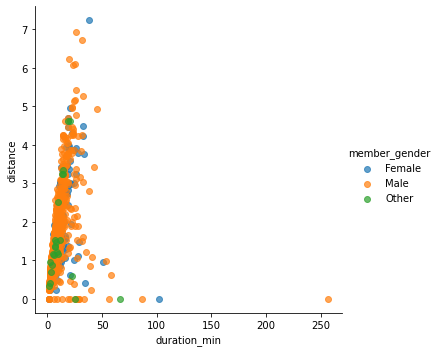

In [51]:
# sample 1000 from df_plot

df_1000 = df_plot.sample(1000)

# plot the duration and distance and segment by gender
sb.lmplot(data = df_1000, x = 'duration_min', y = 'distance', hue = 'member_gender', fit_reg=False, scatter_kws={'alpha': 0.7});

**Observation**

As known already, there are more male samples than female samples. From the plot, the highest trip distance and duration was obtained by a female.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

For both user types, customers and subscribers, the 'other' gender took the longest trips. Considering the two majority genders, females took longer rides

### Were there any interesting or surprising interactions between features?

There was no proper correlation between gender, user type and duration in minutes

## Conclusions

* The distribution of duration and distance were similar and skewed to the right. Users with a trip distance of 0 km were due to the fact that the start and end station were the same or they did not travel at all.
* Most of the users were male. Males were about 3x the number of females.
* Most of the users did not share bikes for all trips
* The ages of most users were between 25 and 40
* The average trip duration was 12 minutes with majority of the bike rides being below 100 minutes.
* Majority of bike rides were above 10km.
* Users between ages 20 and 60 usually ride the bicycles for longer distance as compare to users above these ages.
* Females usually took longer rides in terms of duration
* Customers usually took longer rides than subscribers in terms of duration and distance


## References

1. https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points
2. https://seaborn.pydata.org/examples/index.html
3. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
